# Final Report - Data Science 
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

Daniel Nowak Assis - daniel.nowak@pucpr.edu.br

Enzo Ramon Campa - enzo.campa@pucpr.edu.br

Leandro Ceron Durau -

Ivson Soares Ferreira Junior - ivson.junior@pucpr.edu.br

2023

# Import the libs you need

In [2]:
# Import all packages you need here
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import json
import sys
import json


#pd.set_option("display.max_colwidth", None)
#pd.set_option("display.max_columns", None)
#sys.path.append("./")
# etc

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.


### Carregamento das Bases
- 1. Dicionário de Dados da Base Sinasc
- 2. Sinasc
- 3. IBGE 2010

In [3]:
# load your data here
full_df = pd.read_csv("./sinasc_checkpoint.csv")

In [4]:
#print(full_df.columns)
full_df = full_df.drop(['Unnamed: 0','UF', 'Município', 'ESTADO'], axis= 1)


# General Characteristics

In this section, you should report the main dataset chracteristics, including but not limited to:
* Number of instances
* Number of features
* Number of classes
* Class distribution

## Contexto da Base de Dados

Esse dataset engloba ocorrencias de dados de partos que ocorreram no SUS no ano de 2021, em que contêm dados sobre a mãe, o recém nascido e fatores socio-econômicos. O target é relacionado a prematuridade (se o recém nascido é prematuro ou não)

In [5]:
# use as many code and text cells you wish
shape = full_df.shape
print(f"O dataset tem {shape[0]} instâncias e {shape[1] - 1} atributos (sem o target)")

O dataset tem 2642812 instâncias e 30 atributos (sem o target)


In [5]:
print(f"O dataset tem {full_df['GESTACAO'].nunique()} classes")

O dataset tem 2 classes


In [6]:
value_counts = full_df['GESTACAO'].value_counts()
print(f"classe 0 tem {value_counts[0]} exemplos e a classe 1 tem {value_counts[1]} exemplos")

classe 0 tem 2339162 exemplos e a classe 1 tem 303650 exemplos


In [7]:
print("De todos os valores de todas as features, ",end = "")
print(f"{100 * round(full_df.isna().sum().sum() / (shape[0] * shape[1]),3)}% dos valores são faltantes")

De todos os valores de todas as features, 3.6999999999999997% dos valores são faltantes


## DESCRIÇÃO DE 10 ATRIBUTOS

1. LOCNASC : Local onde ocorreu o parto, podendo ser em hospital, outros estabelecimentos de saúde, domicílio, outros e Aldeia Indígena.

2. IDADEMAE : Idade da mãe no momento em que ocorreu o parto

3. GESTACAO : Indica se o recém-nascido é prematuro ou não

4. PESO : Peso do recém nascido

5. KOTELCHUCK : Índice de Kotelchuck. É um indice na área da saúde para mensurar a qualidade da consulta pré-natal dado o mês de gestação em que iniciaram o pré-natal

6. ESCMAE2010 : Escolaridade da mãe em relação a classificação de 2010, podendo ser : Sem Escolaridade, Fundamental I Incompleto, Fundamental I Completo, Fundamental II Incompleto, Fundamental II Completo, Ensino Médio Incompleto, Ensino Médio Completo, Superior Incompleto, Superior Completo, Ignorado, 
Fundamental I Incompleto ou Inespecífico, Fundamental II Incompleto ou
Inespecífico, Ensino Médio Incompleto ou Inespecífico.

7. TPFUNCRESP : Funcionário responsável pela anotação dos dados

8. PARIDADE : Indica se a mãe já teve gravidez anterior

9. CONSULTAS : Número de consultas de pré‐natal realizadas pela mãe.

10. PARTO : Tipo de parto: podendo ser vaginal ou cesário.

# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables. 

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

In [8]:
# place as many cells to plot the visualizations, 
# as well as to describe the main findings

### DANIEL 

## 1. Qual é a distribuição de pesos dos recém-nascidos?

<Axes: xlabel='PESO'>

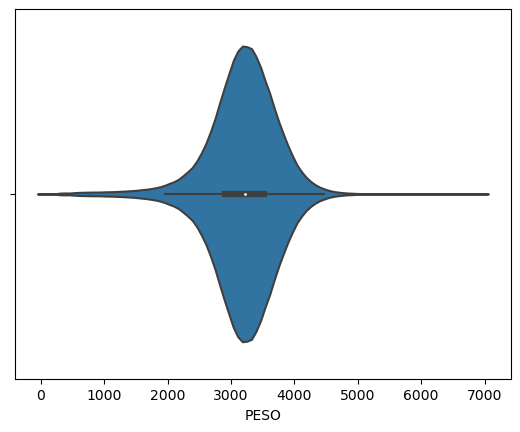

In [9]:
peso_feto = full_df['PESO']
#print(peso_feto.head())
sns.violinplot(x = peso_feto)

Aparentemente segue uma curva normal, porém é perceptivel são mais esparsos para valores mais baixos como 2000 e abaixo comparado a densidade presente no lado direito.

In [10]:
#peso_feto.plot(kind='density')

In [11]:
peso_feto.describe()

count    2.642374e+06
mean     3.178913e+03
std      5.631564e+02
min      3.000000e+00
25%      2.900000e+03
50%      3.215000e+03
75%      3.525000e+03
max      7.000000e+03
Name: PESO, dtype: float64

In [12]:
peso_feto.skew()

-0.8916472349547755

Assimetrica negativa comprova que os valores mais baixos de peso são mais esparsos  

## 2. Qual a frequência do índice de Kotelchuck?

In [13]:
kotelchuck = full_df['KOTELCHUCK']

<Axes: xlabel='KOTELCHUCK', ylabel='count'>

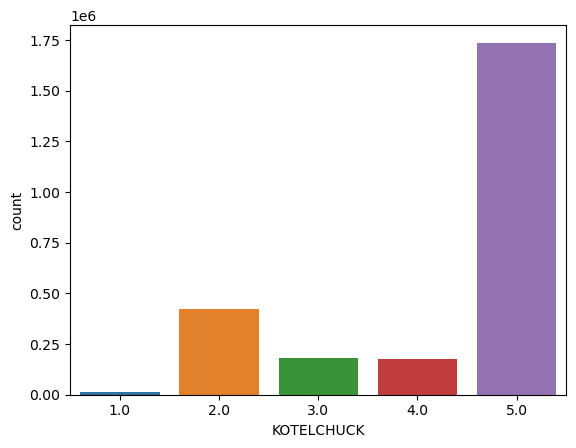

In [14]:
sns.countplot(x = kotelchuck)

Índice de Kotelchuck é uma métrica de qualidade de ida a consultas pré-natal. Quanto maior o indice, mais a mãe teve consultas pré natal. Maior parte dos exemplos de parto foram com mães que fizeram consultas consideradas "mais do que adequado" para o índice de Kotelchuck.

Apesar de não ser causa-efeito, o índice de kotelchuck pode indicar o motivo do dataset ter desbalanceamento de classe, dado que o acompanhamento médico é uma das melhores prevensões segundo explicado em https://www.gov.br/ebserh/pt-br/hospitais-universitarios/regiao-sudeste/hc-ufmg/comunicacao/noticias/prematuridade-pre-natal-adequado-e-a-melhor-forma-de-prevencao  

## 3. Qual a porcentagem de récem-nascidos do sexo masculino e feminino?

In [15]:
sexo = full_df[full_df['SEXO'] != 0]['SEXO']

In [16]:
sexo.nunique()

2

<Axes: xlabel='SEXO', ylabel='count'>

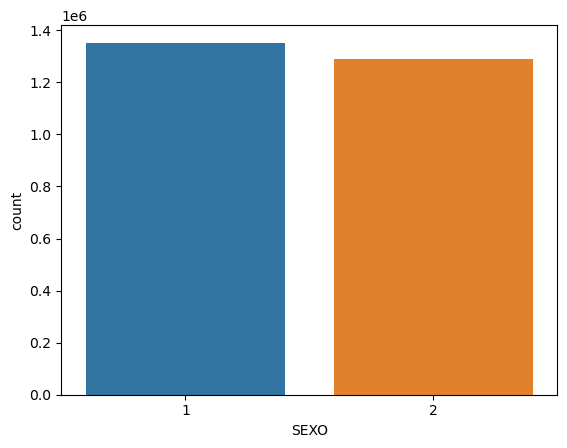

In [17]:
sns.countplot(x = sexo)

In [18]:
counts = sexo.value_counts()

In [19]:
print(f"{ round(counts[2]/ shape[0],4)} % dos recém-nascidos são do sexo feminino")

0.4883 % dos recém-nascidos são do sexo feminino


In [20]:
print(f"{ round(counts[1]/ shape[0],4)} % dos recém-nascidos são do sexo masculino")

0.5116 % dos recém-nascidos são do sexo masculino


Os valores são próximos do esperado (50/50).

Vamos verificar se há alguma diferença entre recém-nascidos do sexo feminimo e masculino na análise multivariada.

## 4. Quantos casos tem de mães que já perderam outros filhos em gravidez anterior?

In [21]:
fil_mort =full_df['QTDFILMORT']

In [22]:
fil_mort.value_counts()

0.0     2047955
1.0      411617
2.0       79060
3.0       17818
4.0        4360
5.0        1436
6.0         578
7.0         209
8.0         136
10.0        114
9.0          74
11.0         27
99.0         11
12.0         10
20.0          8
13.0          7
14.0          5
15.0          4
19.0          3
26.0          2
17.0          2
30.0          1
28.0          1
22.0          1
24.0          1
21.0          1
Name: QTDFILMORT, dtype: int64

In [23]:
fil_mort = full_df[full_df['QTDFILMORT'] <= 4]['QTDFILMORT']

In [24]:
fil_mort.value_counts()

0.0    2047955
1.0     411617
2.0      79060
3.0      17818
4.0       4360
Name: QTDFILMORT, dtype: int64

<Axes: xlabel='QTDFILMORT', ylabel='count'>

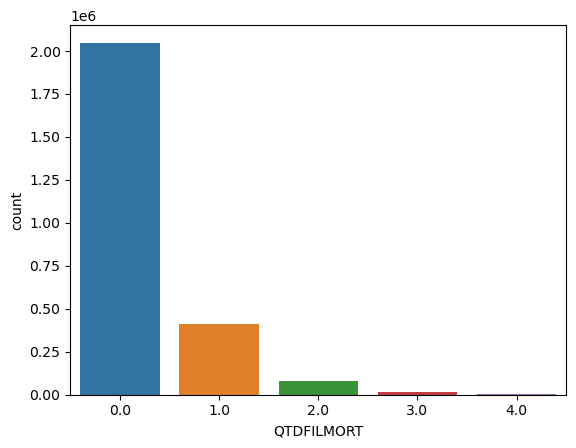

In [ ]:
sns.countplot(x = fil_mort)

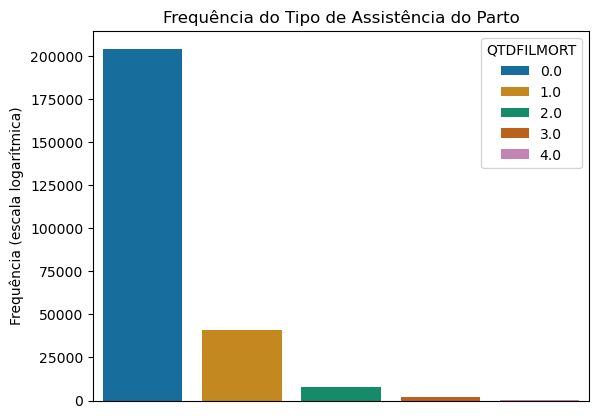

In [66]:
fil_mort = full_df[full_df['QTDFILMORT'] <= 4]
ax = sns.countplot(data=fil_mort, x='QTDFILMORT', hue='QTDFILMORT', dodge=False, palette='colorblind')
ax.set(xlabel=None)
plt.ylabel('Frequência (escala logarítmica)')
plt.title("Frequência do Tipo de Assistência do Parto")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

Em maioria dos partos, a mulher havia tido 0 percas.

É notavel que alguns casos improváveis se apresentam nesse dataset. Por exemplo, 11 casos em que mulheres obtiveram 99 percas anteriores ao parto, que indica possívelmente ruído por parte dos anotadores no hospital.

## 5. Qual o número de consultas pré-natal realizadas pelas mães? 

In [ ]:
prenat =full_df['CONSPRENAT']

[]

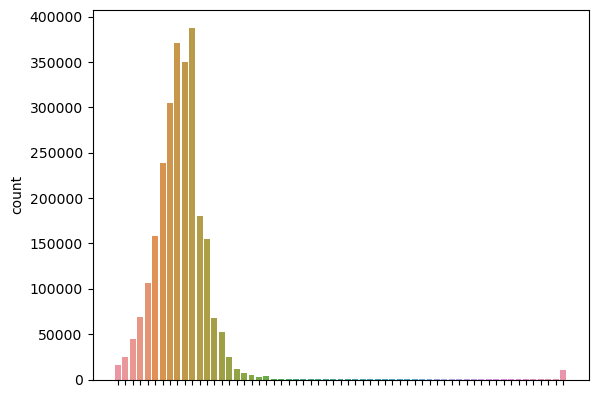

In [ ]:
sns.countplot(x = prenat).set(xlabel=None)
plt.tick_params(labelbottom = False)
plt.plot()

Como peso, o número de consultas pré-natal aparenta ser uma distribuição normal. É notavel que um valor elevado apresenta-se como ruido

In [ ]:
prenat.describe()

count    2.595710e+06
mean     8.728230e+00
std      6.648187e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      9.900000e+01
Name: CONSPRENAT, dtype: float64

sendo o valor máximo possívelmente o ruído.

### IVSON

### 1. Qual é a Frequência dos Tipos de Assistência do Parto ?


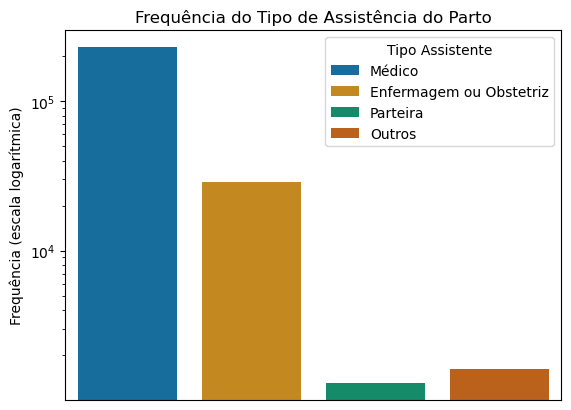

In [143]:
assist_parto = full_df[['TPNASCASSI']]
ax = sns.countplot(data=assist_parto[assist_parto['TPNASCASSI'] != 'nan'], x='TPNASCASSI', hue='TPNASCASSI', dodge=False, palette='colorblind')
ax.set_yscale('log')
ax.set(xlabel=None)
plt.ylabel('Frequência (escala logarítmica)')
plt.title("Frequência do Tipo de Assistência do Parto")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend(title='Tipo Assistente')
plt.show()

### Com base no gráfico acima podemos observar que apesar da assistência médica durante o parto ser mais comum, a soma dos outros tipos correspondem a quase metade do total. Dessa forma, fica evidente que um parto não é um procedimento predominantemente médico


### 2. Qual a distribuição dos tipos de apresentação do Recém Nascido na hora do parto


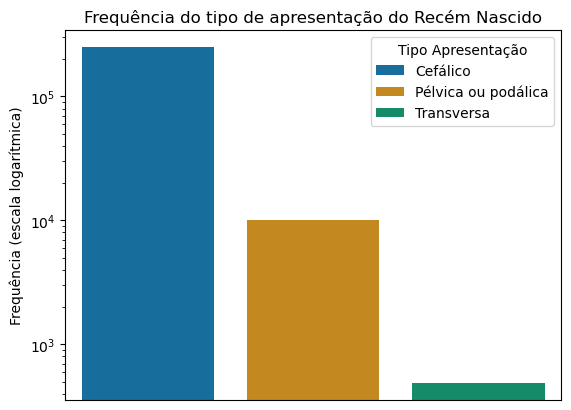

In [142]:
aprs_rn = full_df[['TPAPRESENT']]
ax = sns.countplot(data=aprs_rn[aprs_rn['TPAPRESENT'] != 'nan'], x='TPAPRESENT', hue='TPAPRESENT', dodge=False, palette='colorblind')
ax.set_yscale('log')
ax.set(xlabel=None)

plt.ylabel('Frequência (escala logarítmica)')
plt.title("Frequência do tipo de apresentação do Recém Nascido")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend(title='Tipo Apresentação')
plt.show()

### A apresentação cefálica é a mais comum, apesar da apresentação pélvica também ser relevante. Complicações relacionadas ao tipo de apresentação depende de outros fatores, contudo fica claro que a transversal é um evento raro, o que contribui para um parto mais seguro


## 3. Levanto em conta que o parto não é predominantemente um procedimento médico e que a apresentação do recém nascido contribui para um parto normal, qual é a distribuição dos tipos de parto?


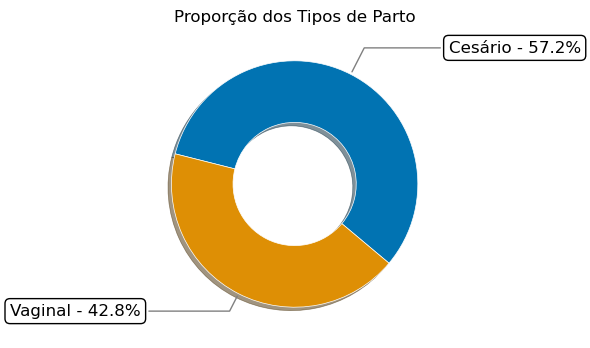

In [141]:
palette_color = sns.color_palette('colorblind')
gp_parto = full_df[(full_df['PARTO'] != 'nan') & (full_df['PARTO'] != 'Ignorado') ]\
                .groupby('PARTO')\
                .agg(contagem=("PARTO", 'count'))\
                .reset_index()

palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = gp_parto['PARTO'].unique()
wedges, texts= ax.pie(x=gp_parto['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{gp_parto['contagem'].values[i] / sum(gp_parto['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))

plt.title("Proporção dos Tipos de Parto")
plt.show()

### Apesar dos resultados obtidos nos primeiros gráficos(Tipo de Assistente, Tipo de Apresentação do Recém Nascido), o parto Vaginal(normal) não é predominante. Esse é um tema debatido na sociedade atualmente, porém com o conjunto de dados atual, somado ao escopo do estudo, não mergulharemos nesse linha de investigação.


### TODO - Investigar idade da mãe


C:\Users\ivson\AppData\Local\Temp\ipykernel_18140\1341977224.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(aprs_rn[aprs_rn['IDADEMAE'] != 'nan'], x='IDADEMAE',  binwidth=5, palette='colorblind')


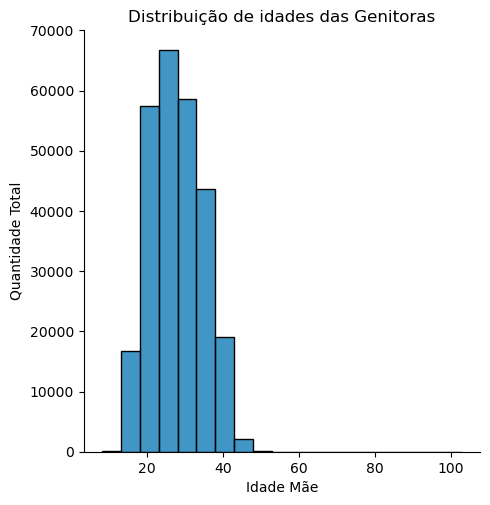

In [140]:
aprs_rn = full_df[['IDADEMAE']]
ax = sns.displot(aprs_rn[aprs_rn['IDADEMAE'] != 'nan'], x='IDADEMAE',  binwidth=5, palette='colorblind')
plt.xlabel('Idade Mãe')
plt.ylabel('Quantidade Total')
plt.title("Distribuição de idades das Genitoras")
plt.show()

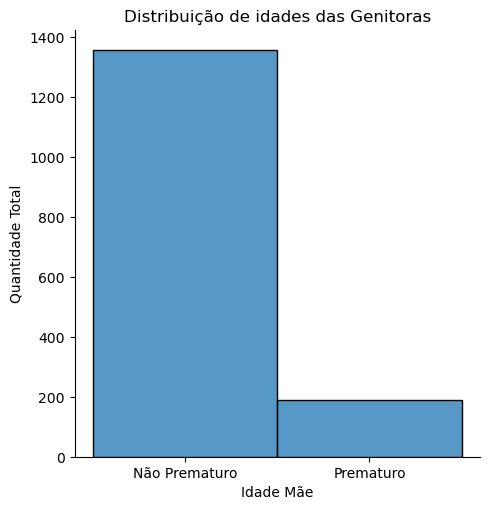

In [ ]:
aprs_rn_morto = full_df[(full_df['QTDFILMORT'] > 10 ) & (full_df['QTDGESTANT'] <= 0)]
ax = sns.displot(aprs_rn_morto[aprs_rn_morto['GESTACAO'] != 'nan'], x='GESTACAO',  binwidth=5)
plt.xlabel('Idade Mãe')
plt.ylabel('Quantidade Total')
plt.title("Distribuição de idades das Genitoras")
plt.show()

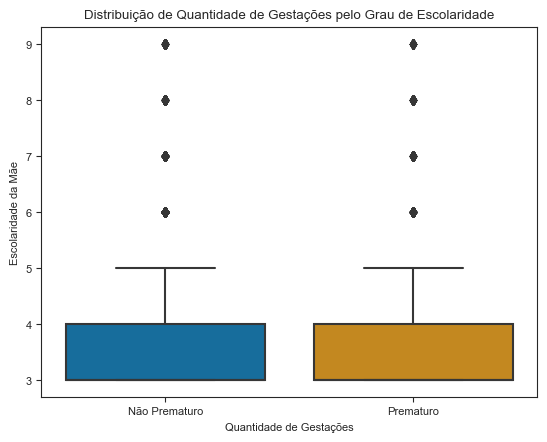

In [ ]:
esc_gest = full_df[(full_df['QTDFILMORT'] >= 3) & (full_df['QTDFILMORT'] < 10)]
sns.boxplot(y=esc_gest['QTDFILMORT'], x=esc_gest['GESTACAO'], palette='colorblind')
plt.xlabel("Quantidade de Gestações")
plt.ylabel("Escolaridade da Mãe")
plt.title("Distribuição de Quantidade de Gestações pelo Grau de Escolaridade")
plt.show()

## 4. Sabemos que o fato de gerar um pessoa custa tempo e esforço, principalmente da genitora. Dessa forma, qual seria o impacto na educação dessas mulheres


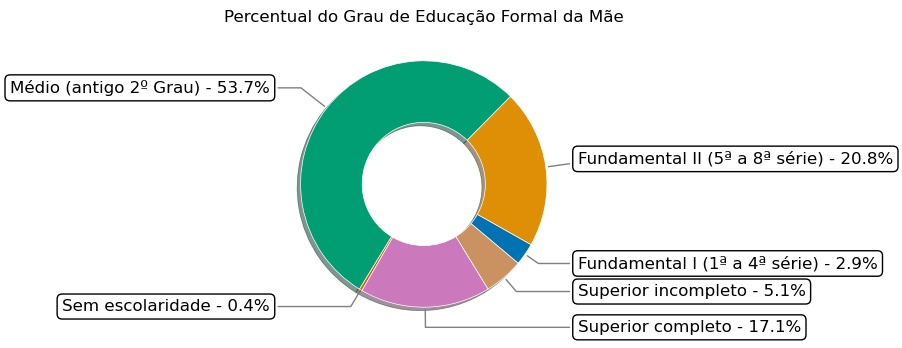

In [ ]:
esc_mae = full_df[full_df['ESCMAE2010'] != 'nan'].groupby('ESCMAE2010').agg(contagem=('ESCMAE2010', 'count')).reset_index()
palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = esc_mae['ESCMAE2010'].unique()
wedges, texts= ax.pie(x=esc_mae['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{esc_mae['contagem'].values[i] / sum(esc_mae['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))

plt.title("Percentual do Grau de Educação Formal da Mãe")
plt.show()

### Apesar de 82,9% dessas mulheres não completarem o ensino superior não podemos inferir que esta seja a causa desse problema devido aos diversos fatores o compõe, contudo podemos observar como o grau de escolaridade impacta na quantidade de filhos


## 5. Atualmente muito se discute sobre antinatalismo, nesse sentido o que nossos dados nos contam sobre isso?


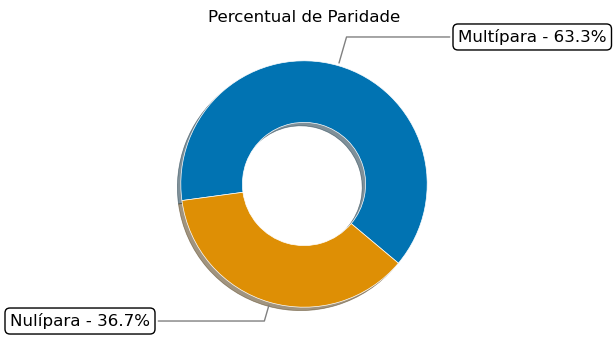

In [ ]:
par_mae = full_df[full_df['PARIDADE'] != 'nan'].groupby('PARIDADE').agg(contagem=('PARIDADE', 'count')).reset_index()
palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = par_mae['PARIDADE'].unique()
wedges, texts= ax.pie(x=par_mae['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{par_mae['contagem'].values[i] / sum(par_mae['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))
plt.title("Percentual de Paridade")
plt.show()

### Relacionar isso ao movimento antinatalista pode ser um exagero, porém como pode ser obversado é mais provável que alguém que já teve um filho tenha outro.

### Enzo

# 1. Em quais locais são mais comuns onde acontecem os partos? 

[]

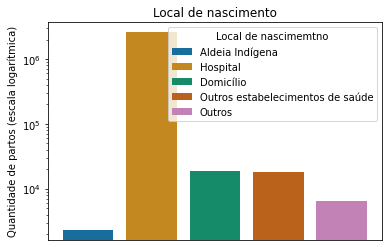

In [ ]:
loc_nasc = full_df[["LOCNASC"]].rename(columns={"LOCNASC": "Local de nascimemtno"})

data = sns.countplot(data=loc_nasc[loc_nasc["Local de nascimemtno"] != 'nan'], x="Local de nascimemtno", hue="Local de nascimemtno", dodge=False, palette='colorblind')
data.set(xlabel=None)
data.set_yscale('log')
plt.ylabel('Quantidade de partos (escala logarítmica)')
plt.title("Local de nascimento")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.plot()

In [ ]:
contagem = loc_nasc["Local de nascimemtno"].value_counts()

print(f'Hospital: {contagem["Hospital"]}')
print(f'Domicílio: {contagem["Domicílio"]}')
print(contagem["Hospital"]/ len(loc_nasc["Local de nascimemtno"]))
print(contagem["Domicílio"]/ len(loc_nasc["Local de nascimemtno"]))
print(contagem["Outros estabelecimentos de saúde"]/ len(loc_nasc["Local de nascimemtno"]))

Hospital: 2597410
Domicílio: 18485
0.9828205714216524
0.006994443796985938
0.006788980827996846


Percebemos que 2597410, equivalente a 98,28% dos partos ocorrem nos hospitais, 0,68% ocorre em outros estabeleciemntos de saúde e aproxiamdamente 1% em outros locais.

# 2. Atualmente, nascem mais crianças em cidade grandes ou pequenas?

[]

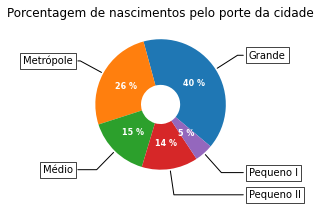

In [ ]:
def format_custom(pct):
    return f'{round(pct)} %'

porte_cidade = full_df[["Porte"]]
contagem = porte_cidade["Porte"].value_counts()


fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(contagem, wedgeprops={'width':.7,}, textprops={"color":'w'}, startangle=-40, autopct=lambda pct: format_custom(pct))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

plt.setp(autotexts, size=8, weight="bold")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    ax.annotate(f'{contagem.index[i]}', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw)

plt.title("Porcentagem de nascimentos pelo porte da cidade")
plt.plot()

In [ ]:
print(f'Grande: {contagem["Grande"] + contagem["Metrópole"]}')
print(f'Medio: {contagem["Médio"]}')
print(f'Pequena: {contagem["Pequeno I"] + contagem["Pequeno II"]}')

Grande: 1746368
Medio: 406704
Pequena: 489736


Podemos observar que 1746368 (66%) dos nasciemntos ocorrem em cidades grandes, enquanto apenas 489736 (19%) ocorrem em cidades pequenas. Os outros 406704 (15%) ocorrem em cidades de porte médio.

# 3. Existem muitos recém nascidos com anomalias?

[]

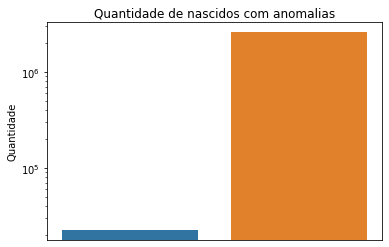

In [ ]:
anomalias = full_df[["IDANOMAL"]].rename(columns={"IDANOMAL": "Nascidos com anomalias"})

data = sns.countplot(x=anomalias["Nascidos com anomalias"])
data.set(xlabel=None)
data.set_yscale('log')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Quantidade')
plt.title("Quantidade de nascidos com anomalias")
plt.plot()

In [ ]:
contagem = anomalias["Nascidos com anomalias"].value_counts()
print(f'Com anomalias: {contagem[1] / len(anomalias["Nascidos com anomalias"])}')
print(f'Sem anomalias: {contagem[2] / len(anomalias["Nascidos com anomalias"])}')

Com anomalias: 0.008609768685778632
Sem anomalias: 0.9751980087876095


Aproximadamente 97,52% dos recém nascidos não apresentam nenhuma anomalia.

# 4. Qual o proporção do nascimento de gêmeos em relação ao de não gêmeos?

[]

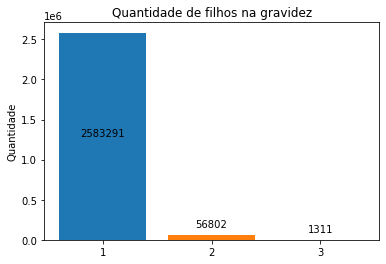

In [ ]:
def addlabels(x,y):
    for i in x:
        pos = y[i]//2 if i == 1 else y[i] + 100000
        plt.text(i,pos, y[i], ha="center")

qtd_filhos = full_df[["GRAVIDEZ"]].rename(columns={"GRAVIDEZ": "Quantidade de filhos na gravidez"})

contagem = qtd_filhos["Quantidade de filhos na gravidez"].value_counts()

fig, ax = plt.subplots()
ax.bar(contagem.index, contagem, label=contagem.index, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

addlabels(contagem.index, contagem)

plt.xticks(contagem.index)
plt.ylabel('Quantidade')
plt.title("Quantidade de filhos na gravidez")
plt.plot()

In [ ]:

print(f'Gêmeos: {contagem[2] + contagem[3]} - {(contagem[2] + contagem[3]) / len(qtd_filhos["Quantidade de filhos na gravidez"])}')
print(f'Não gêmeos: {contagem[1]} - {contagem[1] / len(qtd_filhos["Quantidade de filhos na gravidez"])}')

Gêmeos: 58113 - 0.021989078299932043
Não gêmeos: 2583291 - 0.9774781558430944


Aproxiamdamente 2,2% dos nascimentos são de gêmeos, com 2 ou mais crianças, portanto 97,8% dos nascimentos constam apenas 1 criança.   

# 5. Qual a idade mais comum para ser mãe 

[]

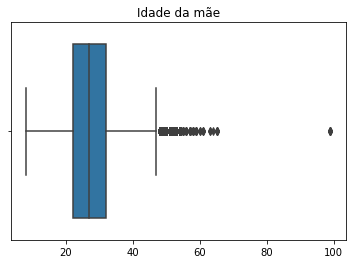

In [ ]:
idades_maes = full_df[["IDADEMAE"]].rename(columns={"IDADEMAE": "Idade mae"})

data = sns.boxplot(x=idades_maes["Idade mae"])
plt.xlabel("")
plt.title("Idade da mãe")
plt.plot()

In [ ]:
idades_maes["Idade mae"].describe()

count    2.642776e+06
mean     2.728197e+01
std      6.772831e+00
min      8.000000e+00
25%      2.200000e+01
50%      2.700000e+01
75%      3.200000e+01
max      9.900000e+01
Name: Idade mae, dtype: float64

Ataulmente, a idade mais comum para ser mãe é entre 22 e 32 anos, ainda assim é comum ser uma nova mãe até os 67. Percebemos que exitem algus casos atípicos de mães bem novas a partir de 8 anos.

# Leandro

### 1) Qual é a distribuição da idade dos Pais?

<Axes: xlabel='IDADEPAI'>

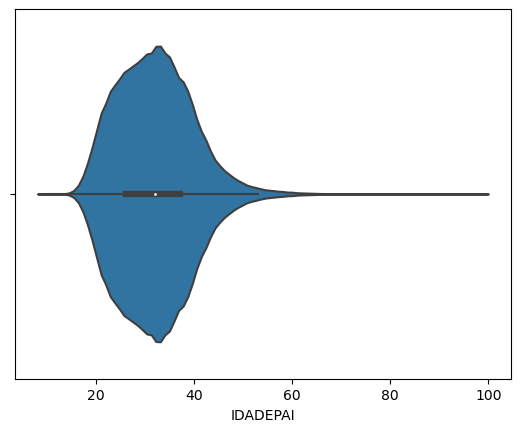

In [6]:
sns.violinplot(x=full_df['IDADEPAI'])

Podemos visualizar que os pais tem uma grande concentração entre os 25 a 40 anos, onde seria a idade considerada "normal" para ter filhos, mas vemos que as idades são mais esparças nos valores mais altos, demonstrando a realidade que homens ainda podem ter filhos com idades avaçadas

In [7]:
full_df['IDADEPAI'].describe()

count    919880.000000
mean         31.906250
std           7.765183
min           9.000000
25%          26.000000
50%          32.000000
75%          37.000000
max          99.000000
Name: IDADEPAI, dtype: float64

In [8]:
full_df['IDADEPAI'].skew()

0.6031497246777205

A assimetria positiva demonstra novamente essa esparidade dos dados nas idades maiores

### 2) Qual é a porporção de trabalhos de partos induzidos e não induzidos?

<Axes: xlabel='STTRABPART', ylabel='count'>

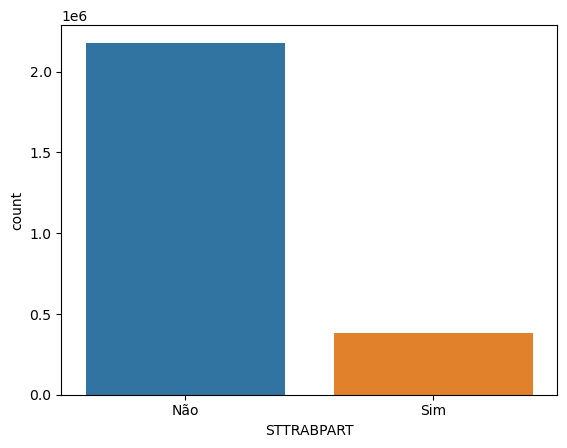

In [9]:
sns.countplot(x=full_df["STTRABPART"])

In [10]:
count_trab = full_df["STTRABPART"].value_counts()
print(count_trab)

Não    2179188
Sim     382070
Name: STTRABPART, dtype: int64


In [11]:
print(f'{100*round(count_trab["Não"]/shape[0],4)}% do trabalhos de partos não foram induzidos')

82.46% do trabalhos de partos não foram induzidos


In [12]:
print(f'{100*round(count_trab["Sim"]/shape[0],4)}% do trabalhos de partos foram induzidos')

14.46% do trabalhos de partos foram induzidos


Podemos ver que a maioria dos trabalhos de partos ainda começam naturalmente. Levando isso em consideração pode haver alguma relação com trabalhos de partos induzidos a outras variáveis com distribuições menores ou, levando que é algo que talvez não seja muito desejado, podemos ver algumas relações com partos induzidos e a prematuridade

### 3) Com quantos meses a maioria das maes procuram realizar um pre-natal?

[]

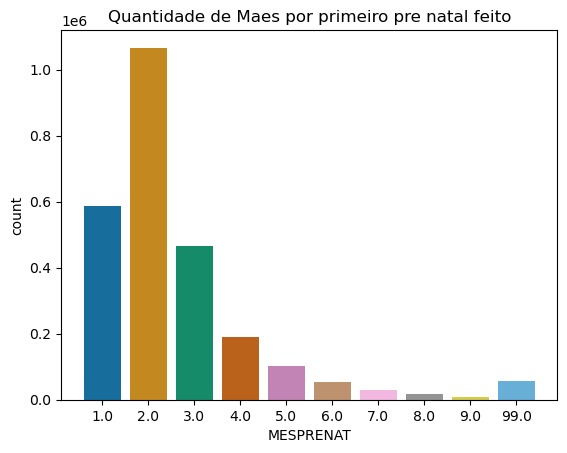

In [15]:
sns.countplot(x=full_df["MESPRENAT"], palette='colorblind', dodge=False)
plt.title("Quantidade de Maes por primeiro pre natal feito")
plt.plot()

In [16]:
count_mes = full_df["MESPRENAT"].value_counts()
print(count_mes)

2.0     1066848
1.0      587918
3.0      466256
4.0      188883
5.0      103681
99.0      57056
6.0       54582
7.0       30223
8.0       16375
9.0        8512
Name: MESPRENAT, dtype: int64


In [17]:
print(f'{100*round(count_mes[99.0]/shape[0],4)} % de dados 99 na nossa base')

2.16 % de dados 99 na nossa base


Como podemos ver a maioria das maes realizam o primeiro exame do pre-natal com 1 ou 3 meses. Com uma pesquisa rapida isso faz sentido principalmente na maioridade nos 2 meses, pois a maioria das gestantes tendem a sentir sintomas da gravidez apos 2 a 3 semanas da fertilizacao (Fonte: https://sergiofranco.com.br/saude/sintomas-de-gravidez#:~:text=Na%20maioria%20das%20gesta%C3%A7%C3%B5es%2C%20os,o%20in%C3%ADcio%20do%20per%C3%ADodo%20gestacional.)
Novamente se ve o 99 nos nossos dados, aqui vemos que 2% dos dados apresentam esse comportamento


### 4) Qual e o situacao civil da maioria das maes?

[]

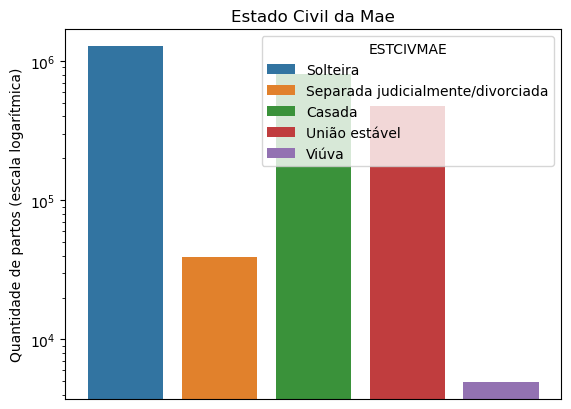

In [23]:
civi = sns.countplot(x=full_df["ESTCIVMAE"], hue=full_df["ESTCIVMAE"], dodge=False)
civi.set(xlabel=None)
civi.set_yscale('log')
plt.ylabel('Quantidade de partos (escala logarítmica)')
plt.title("Estado Civil da Mae")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.plot()


In [24]:
count_civil = full_df["ESTCIVMAE"].value_counts()
print(count_civil)

Solteira                             1279510
Casada                                812783
União estável                         477878
Separada judicialmente/divorciada      39289
Viúva                                   4933
Name: ESTCIVMAE, dtype: int64


In [25]:
print(f'{100*round((count_civil["Casada"]+count_civil["União estável"])/shape[0],4)}% de maes possuem relacoes civis com alguem' )

48.84% de maes possuem relacoes civis com alguem


In [26]:
print(f'{100*round(count_civil["Solteira"]/shape[0],4)}% de maes solteiras' )

48.41% de maes solteiras


Vemos que as maes estao praticamente divididas pela metade em dois grupos (as que ja tiveram ou tem uma relacao civil com alguem e as que nunca tiveram uma relacao civil com alguem). Como estamos falando de estados civils isso nao mostra necessariamente que as solteiras, separadas ou viuvas nao possuam o pai da crianca presente na vida, mas mostra que ter alguma relacao civil nao e um fator que impede uma pessoa de ter um filho.

### 5) Quais sao as funcoes das pessoas que realizaram a digitacao desses dados?

[]

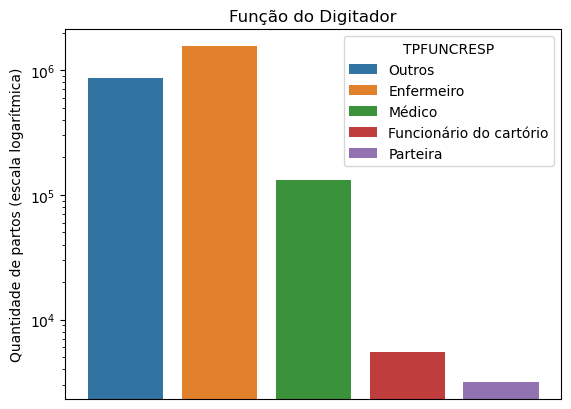

In [29]:
funcoes = sns.countplot(x=full_df["TPFUNCRESP"], hue=full_df["TPFUNCRESP"], dodge=False)
funcoes.set(xlabel=None)
funcoes.set_yscale('log')
plt.ylabel('Quantidade de partos (escala logarítmica)')
plt.title("Função do Digitador")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.plot()

In [30]:
count_funcao = full_df["TPFUNCRESP"].value_counts()
print(count_funcao)

Enfermeiro                 1555269
Outros                      859189
Médico                      132554
Funcionário do cartório       5469
Parteira                      3150
Name: TPFUNCRESP, dtype: int64


In [31]:
print(f'{100*round(count_funcao["Outros"]/shape[0],4)}% dos dados foram preenchidos por outras funcoes')

32.51% dos dados foram preenchidos por outras funcoes


In [32]:
print(f'{round(100*((count_funcao["Enfermeiro"]+count_funcao["Médico"])/shape[0]),2)}% dos dados foram preenchidos por funcoes medicas')

63.86% dos dados foram preenchidos por funcoes medicas


In [33]:
print(f'{round(100*(count_funcao["Enfermeiro"]/shape[0]),2)}% dos dados foram preenchidos por Enfermeiros')

58.85% dos dados foram preenchidos por Enfermeiros


Nossos dados foram majoritariamente preenchidos por funções medicas, mas ainda há uma grande presença de digitadores que não foram especificados suas funções.

Como esse digitadores não possuem uma função definida, essas digitações podem faltar informações de conhecimento medico ou falta de interesse em realiza-lo, o mesmo vale para as vezes que foram realizadas pela parteira, mas também pode ocorrer ocultação de dados que a parteira defina como privados ou vergonhosos de informar, felizmente as parteiras possuem uma presença bem pequena na nossa base de dados.

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

In [ ]:
### IVSON

### Qual a relação entre o número de gestações e a escolaridade?


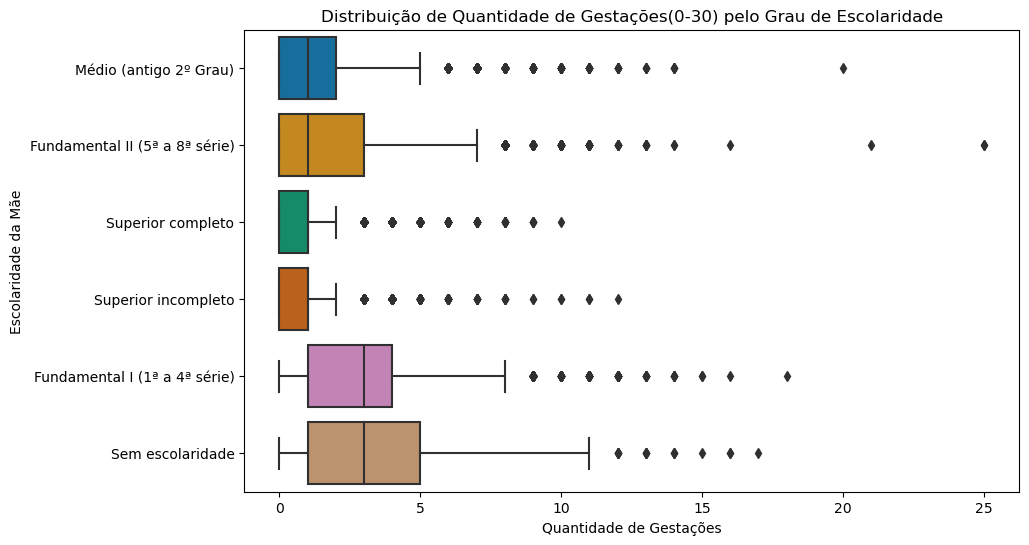

In [139]:
esc_gest = full_df[(full_df['QTDGESTANT'] < 30) &  (full_df['ESCMAE2010'] != 'nan')]
plt.figure(figsize=(10, 6))
sns.boxplot(y=esc_gest['ESCMAE2010'], x=esc_gest['QTDGESTANT'], orient='h', palette='colorblind')
plt.xlabel("Quantidade de Gestações")
plt.ylabel("Escolaridade da Mãe")
plt.title("Distribuição de Quantidade de Gestações(0-30) pelo Grau de Escolaridade")
plt.show()

#### Apesar de termos visto anteriormente que a maior parte das gestações são de mulheres que concluíram o ensino médio. Nessa gráfico fica claro que quanto maior o grau de escolaridade, menor o número de gestações.

### Qual a distribuição das mulheres gestantes pela escolaridade e estado civil


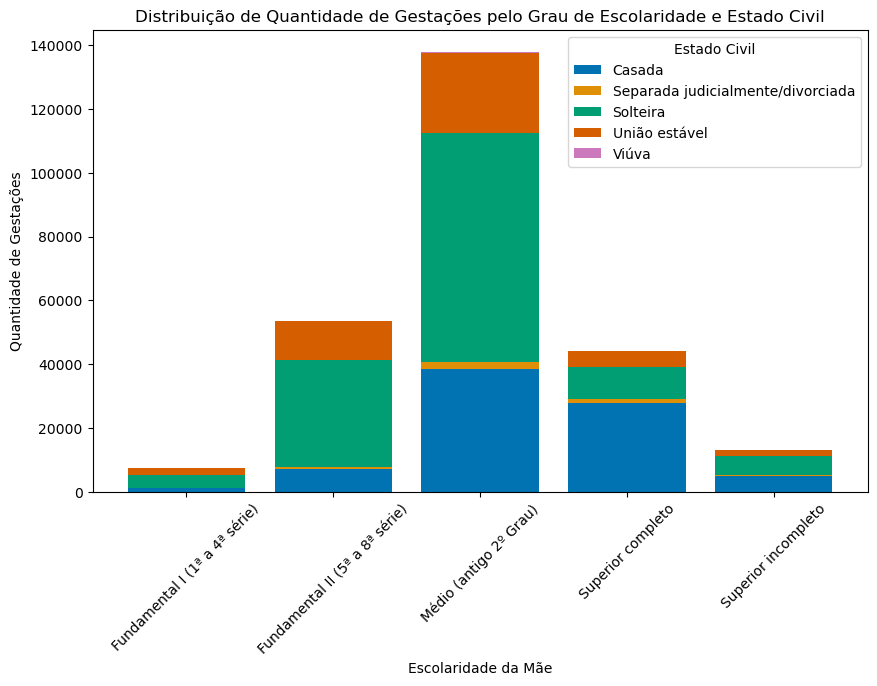

In [137]:
esc_tp_par = full_df[(full_df['ESCMAE2010']      != 'nan') & (full_df['ESCMAE2010']      != 'Sem escolaridade') &
                     (full_df['ESTCIVMAE'] != "nan") & (full_df['ESTCIVMAE'] != "Ignorado")]

count_data = esc_tp_par.groupby(['ESTCIVMAE', 'ESCMAE2010']).size().reset_index(name='Count')

# Pivot the DataFrame to create a format suitable for a stacked bar chart
pivot_data = count_data.pivot(index='ESCMAE2010', columns='ESTCIVMAE', values='Count').fillna(0)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
sns.set_palette('colorblind')
ax = sns.barplot(data=pivot_data, x=pivot_data.index, y=pivot_data.sum(axis=1))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
bottom = 0

for col in pivot_data.columns:
    ax.bar(pivot_data.index, pivot_data[col], label=col, bottom=bottom)
    bottom += pivot_data[col]


plt.xlabel("Escolaridade da Mãe")
plt.ylabel("Quantidade de Gestações")
plt.title("Distribuição de Quantidade de Gestações pelo Grau de Escolaridade e Estado Civil")
plt.legend(title='Estado Civil')
plt.xticks(rotation=45)
plt.show()

### Podemos ver que quanto maior o grau de escolaridade mais mulheres se encontram em estado civil casada. Contudo, o mais interessante é observarmos como a união estável é um estado civil que se aproxima ou ultrapassa a quantidade de casamentos nos graus mais baixos de escolaridadeices here

## TODO - Ivson 2 - Multi Variada 2 - Efetivas

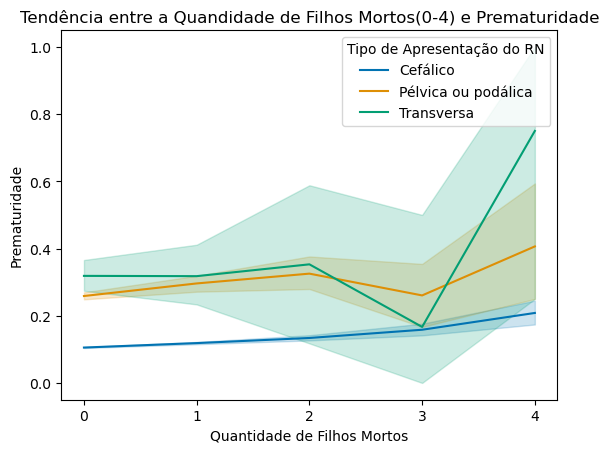

In [134]:
#MultiVariada 1
esc = full_df[['QTDFILMORT', 'GESTACAO', 'TPAPRESENT']][full_df['QTDFILMORT'] < 5]
esc['GESTACAO'] = esc['GESTACAO'].replace("Prematuro", 1).replace("Não Prematuro", 0)
sns.lineplot(data=esc, x="QTDFILMORT", y="GESTACAO", hue='TPAPRESENT')
plt.xticks(range(0, 5))
plt.xlabel("Quantidade de Filhos Mortos")
plt.ylabel("Prematuridade")
plt.title("Tendência entre a Quandidade de Filhos Mortos(0-4) e Prematuridade")
plt.legend(title='Tipo de Apresentação do RN')
plt.show()

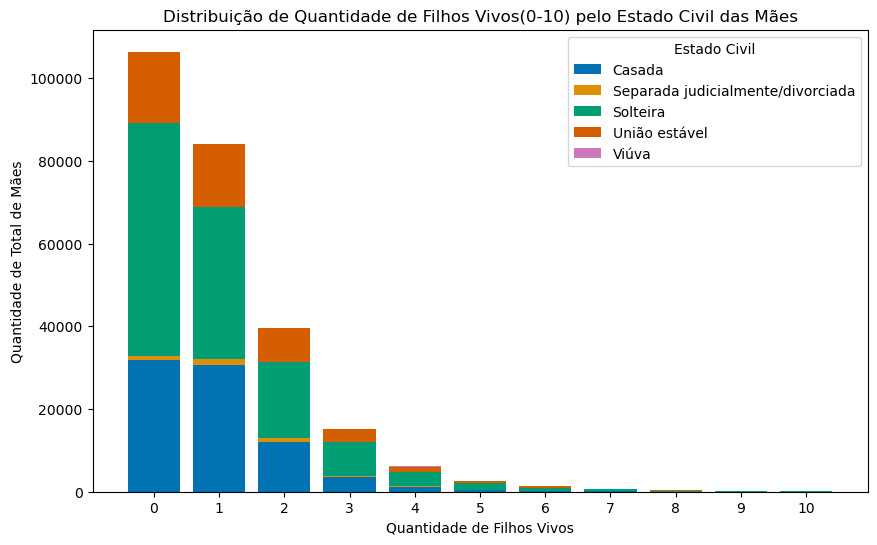

In [135]:
#Efetiva 1
maes_est_civ = full_df[full_df['QTDFILVIVO'] <= 10]
count_data = maes_est_civ.groupby(['ESTCIVMAE', 'QTDFILVIVO']).size().reset_index(name='Count')

pivot_data = count_data.pivot(index='QTDFILVIVO', columns='ESTCIVMAE', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.set_palette('colorblind')
ax = sns.barplot(data=pivot_data, x=pivot_data.index.astype(int), y=pivot_data.sum(axis=1))
bottom = 0

for col in pivot_data.columns:
    ax.bar(pivot_data.index, pivot_data[col], label=col, bottom=bottom)
    bottom += pivot_data[col]


plt.xlabel("Quantidade de Filhos Vivos")
plt.ylabel("Quantidade de Total de Mães")
plt.title("Distribuição de Quantidade de Filhos Vivos(0-10) pelo Estado Civil das Mães")
plt.legend(title='Estado Civil')
plt.show()

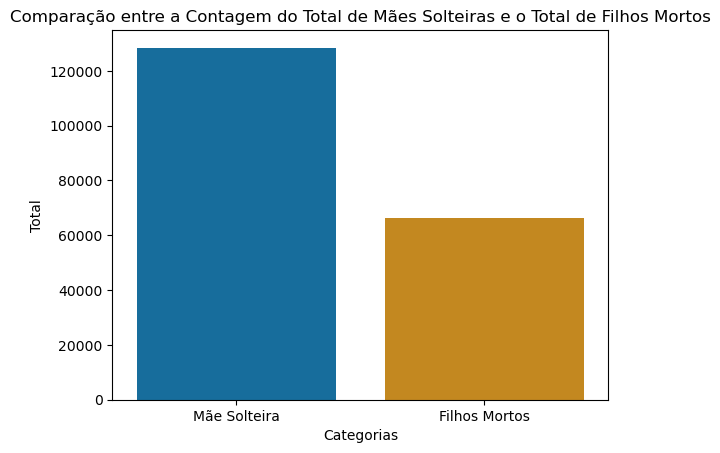

In [130]:
#Multi Variada 2
mae_solo = full_df[full_df['ESTCIVMAE'] == 'Solteira']
filhos_mortos = full_df[full_df['QTDFILMORT'] > 0]

mae_solo_count = mae_solo.shape[0]
filhos_mortos_sum = filhos_mortos['QTDFILMORT'].sum()

data = {'x_': ['Mãe Solteira', 'Filhos Mortos'], 'y_': [mae_solo_count, filhos_mortos_sum]}
sns.barplot(x='x_', y='y_', data=data, palette='colorblind')

plt.xlabel('Categorias')
plt.ylabel('Total')
plt.title('Comparação entre a Contagem do Total de Mães Solteiras e o Total de Filhos Mortos')
plt.show()

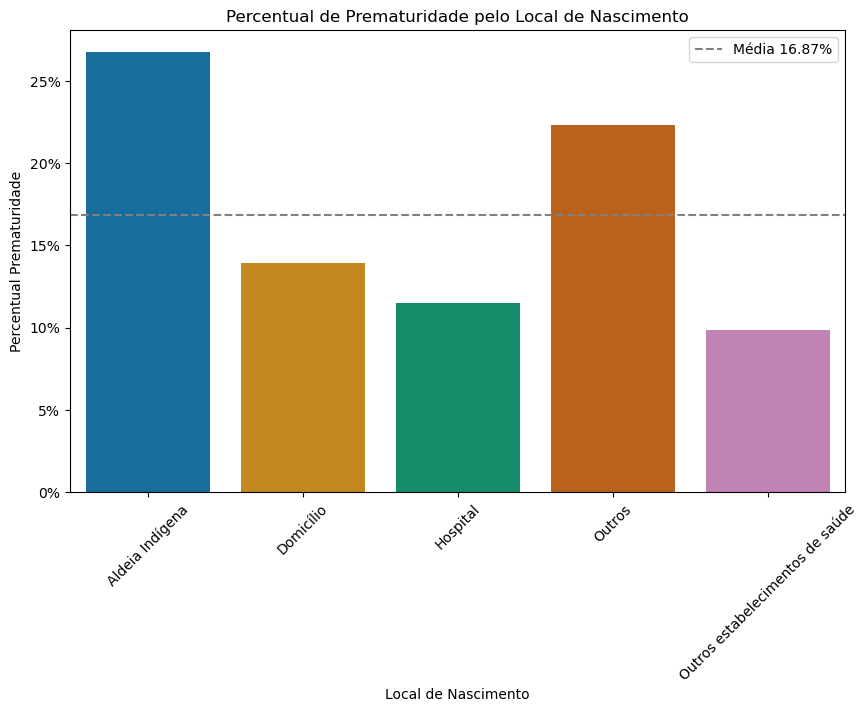

In [129]:
#Efetiva 2
full_df['GESTACAO'] = full_df['GESTACAO'].replace("Não Prematuro", 0).replace("Prematuro", 1)

grouped_data = full_df.groupby('LOCNASC')['GESTACAO'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='LOCNASC', y='GESTACAO', data=grouped_data, palette='colorblind')
plt.xlabel('Local de Nascimento')
plt.ylabel('Percentual Prematuridade')
plt.title('Percentual de Prematuridade pelo Local de Nascimento')
mean_value = grouped_data['GESTACAO'].mean()
ax.axhline(y=mean_value, color='grey', linestyle='--', label=f'Média {mean_value * 100:.2f}%')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{x * 100:.0f}%'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

## TODO Daniel

#### Validar e mandar mensagem caso necessário

2. Qual o impacto da idade da mãe para a prematuridade?

In [ ]:
mae_gest = full_df[(full_df["GESTACAO"] != "nan") & (full_df["IDADEMAE"] != "nan") & (full_df["IDADEMAE"] < 99)]

sns.boxplot(x=mae_gest["IDADEMAE"], y=mae_gest["GESTACAO"], orient="h", palette="colorblind")
plt.xlabel("Idade da mãe")
plt.ylabel("Prematuridade")
plt.title("Prematuridade pela idade da mãe")
plt.plot()

Percebemos que a idade da mãe não possui muita importância para a prematuridade, embora existam alguns casos de prematuridade a mais em mães acima de 50 anos.

# Leandro

### 1) Qual a distribuicao de prematuridade levando em conta o estado civil da mae?

Espero vizualizar uma alta relacao com o estado solteira com a prematuridade do que com outros estados civils, pois as maes com o estado solteira deveram ter menor precesa de uma pessoa que possa auxiliar na gravidez o que aumenta as chances de ocorrer nao so a pre maturidade mas outras doencas que podem afetar tanto o bebe como a mae

<Axes: xlabel='GESTACAO', ylabel='ESTCIVMAE'>

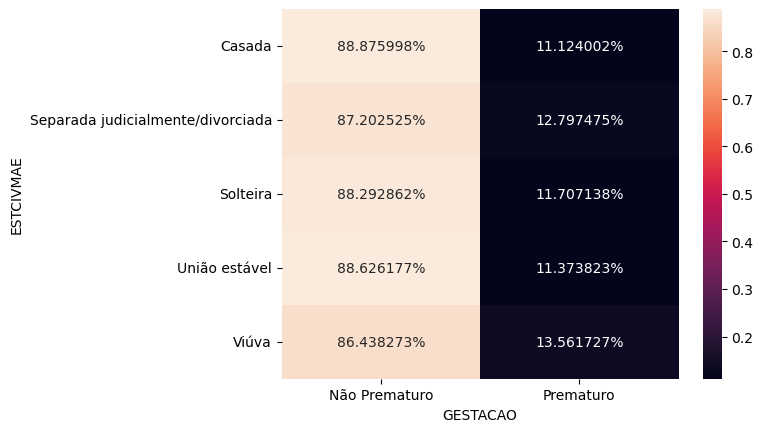

In [35]:
ctab = pd.crosstab(full_df["ESTCIVMAE"],full_df["GESTACAO"], normalize='index')
sns.heatmap(ctab,annot=True,fmt="%",)

<Axes: xlabel='GESTACAO', ylabel='ESTCIVMAE'>

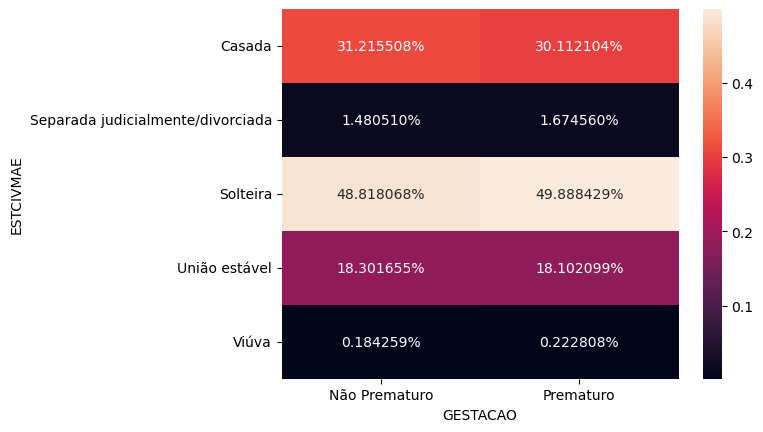

In [36]:
ctab = pd.crosstab(full_df["ESTCIVMAE"],full_df["GESTACAO"], normalize='columns')
sns.heatmap(ctab,annot=True,fmt="%",)

A visualização acaba mostrando que as solteiras realmente têm mais casos de prematuridade, mas como sua presença nos dados é majoritária acaba não sendo uma diferença que demostra meus primeiros pensamentos.

Além disso vemos que independente do estado civil mais ou menos 11% de cada estado civil teve casos de prematuridade o que reforça o ponto que o estado civil da mãe não tende a aumentar ou diminuir as chances de ter filhos prematuros.

### 2) Qual a distribuicao de prematuridade levando em conta se o trabalho de parto foi induzido ou não?

Como teorizado anteriormente, como há uma distribuição menor de partos induzidos, podemos acabar vizualizando uma relação maior entre partos induzidos e prematuridade dos bebes.

<Axes: xlabel='GESTACAO', ylabel='STTRABPART'>

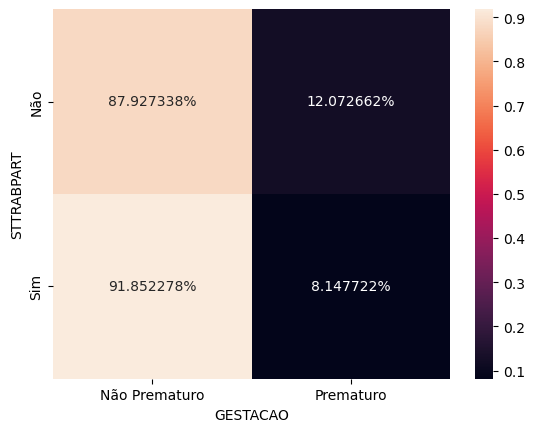

In [38]:
ctab = pd.crosstab(full_df["STTRABPART"],full_df["GESTACAO"], normalize='index')
sns.heatmap(ctab,annot=True,fmt="%",)

Ao contrário do teorizado o trabalho de parto ser induzido não aumenta a chance de acontecer prematuridade, até mesmo aparenta diminuir essa chance com a prematuridade de partos induzidos representando 8% enquanto as de partos naturais 11%.

Ainda sim essa diferença é pequena, ou seja, não irá representar a grande maioria dos casos. Além do trabalho de parto induzido possuir uma baixa chance de acontecer no geral.

Mas será que o parto induzido realmente não está relacionado a doenças?

Vamos ver sua relação com a presença de anomalias 

<Axes: xlabel='IDANOMAL', ylabel='STTRABPART'>

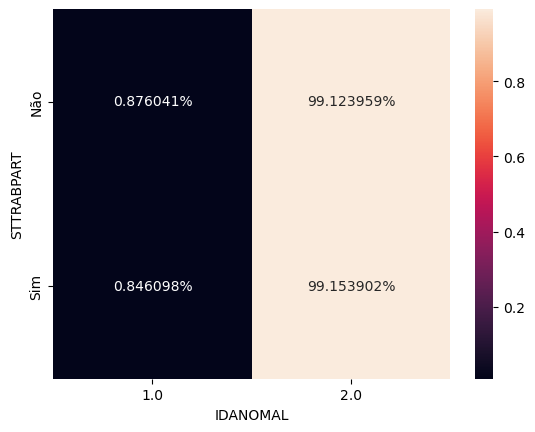

In [42]:
ctab = pd.crosstab(full_df["STTRABPART"],full_df["IDANOMAL"], normalize='index')
sns.heatmap(ctab,annot=True,fmt="%",)
#Lembrando 1-Anomalia identificada   2-Sem anomalias

Novamente o trabalho de parto induzido, por ele ser menor a chance de ocorrer possui quase nenhuma relação com doenças que possam acontecer como teorizado anteriormente.

Ou seja, o parto induzido ou serve para evitar que isso aconteça, por isso apresenta menores chance de acontecer doenças (ainda que de forma pequena), ou acaba sendo um processo mais caro que não é desejado e necessário para a maioria dos casos.

# Final Plots

In this section, you need to enhance 5 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

In [ ]:
### DANIEL

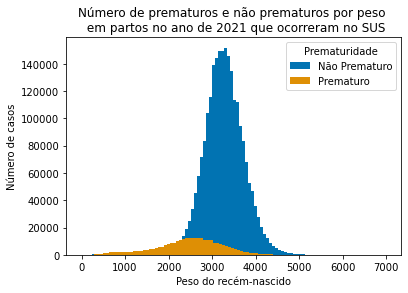

In [ ]:
# your code goes here
full_df.groupby('GESTACAO').PESO.plot(kind = 'hist', bins = 100)
plt.xlabel("Peso do recém-nascido")
plt.ylabel("Número de casos")
plt.title("Número de prematuros e não prematuros por peso \n em partos no ano de 2021 que ocorreram no SUS")
plt.legend(title='Prematuridade')
plt.show()

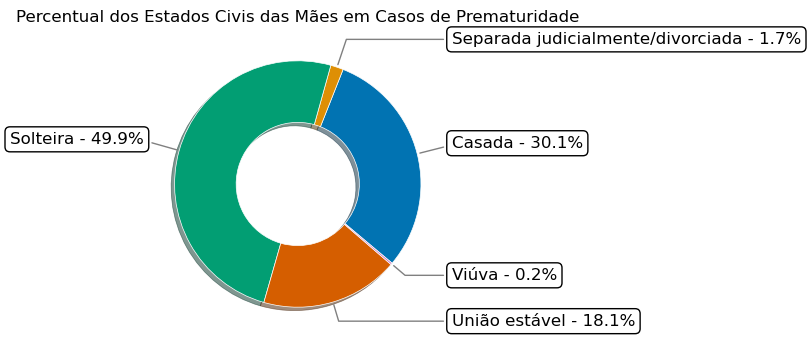

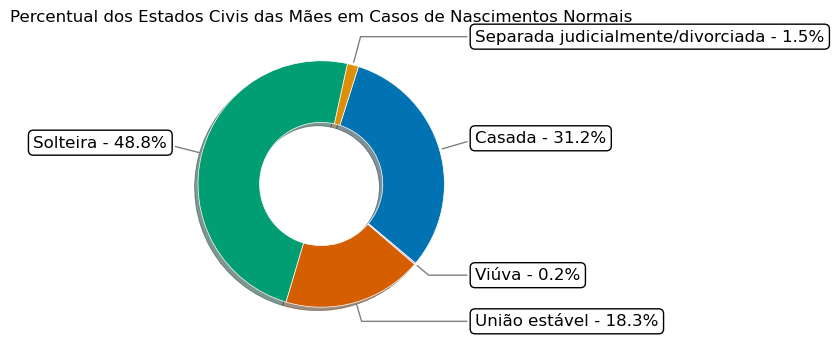

In [47]:
civil_mae = full_df[full_df['GESTACAO'] == 'Prematuro'].groupby('ESTCIVMAE').agg(contagem=('ESTCIVMAE', 'count')).reset_index()
palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = civil_mae['ESTCIVMAE'].unique()
wedges, texts= ax.pie(x=civil_mae['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{civil_mae['contagem'].values[i] / sum(civil_mae['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))
plt.title("Percentual dos Estados Civis das Mães em Casos de Prematuridade")
plt.show()
civil_mae = full_df[full_df['GESTACAO'] == 'Não Prematuro'].groupby('ESTCIVMAE').agg(contagem=('ESTCIVMAE', 'count')).reset_index()
palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = civil_mae['ESTCIVMAE'].unique()
wedges, texts= ax.pie(x=civil_mae['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{civil_mae['contagem'].values[i] / sum(civil_mae['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))
plt.title("Percentual dos Estados Civis das Mães em Casos de Nascimentos Normais")
plt.show()

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

```
Add your text here.
```

# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_team_name>.zip`)
5. Send it over using Blackboard.